# Exploring UCI Heart Disease Data

###  Summary
**Big Picture Summary**: The purpose of this notebook is to explore certain aspects of the UCI Heart disease data. Once the data is explored, it will be used to create a classification model.

**Explored Questions**:

## Importing the data 

In [4]:
# importing relevant packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import spearmanr
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# using jupyter magic to display plots in line
%matplotlib inline

# importing the dataset
heart_disease = pd.read_csv('/Users/yungreezy/cleveland_.csv')

Below is a quick view of the data to ensure it was imported correctly.

In [5]:
# viewing the size of the dataset
print('The size of the dataset: ' + str(heart_disease.shape))

# viewing the first few columns of the dataset
heart_disease.head()

The size of the dataset: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Next, a quick look through the column names and the data types of each column to get a better understanding of the data that will be used:

In [6]:
# displaying column names
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [7]:
#Finding the missing values. 
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [8]:
## dropping rows with missing values 

heart_disease = heart_disease.dropna()

In [9]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# describing the dataframe
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## Univariate Analysis 

In [11]:
# making the target variable binary 
heart_disease = heart_disease.replace({'target': {2:1, 3:1, 4:1}})

In [12]:
print('Our target variable have {} % of target 0 and {} % of target 1'.format(round(100*heart_disease.target.value_counts(normalize = True)[0],2),round(100*heart_disease.target.value_counts(normalize = True)[1],2)))

Our target variable have 53.87 % of target 0 and 46.13 % of target 1


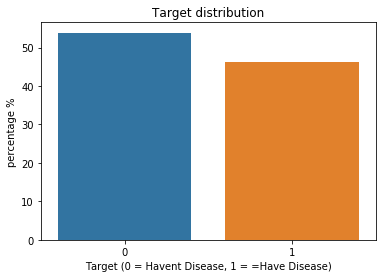

In [13]:
# finding the target variable split
sns.barplot(heart_disease.target.value_counts().index,100*heart_disease.target.value_counts(normalize = True))
plt.title('Target distribution')
plt.xlabel('Target (0 = Havent Disease, 1 = =Have Disease)')
plt.ylabel('percentage %')
plt.show()

The split above shows that the dataset is balanced. 

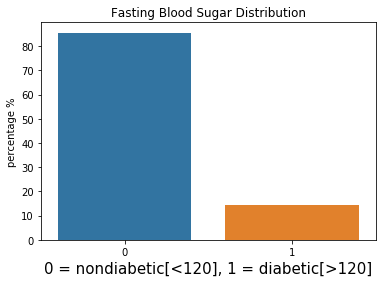

In [16]:
# finding the count of all the type of 'fasting_blood_pressure' 
sns.barplot(heart_disease.fbs.value_counts().index,100*heart_disease.fbs.value_counts(normalize = True))
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('0 = nondiabetic[<120], 1 = diabetic[>120]',fontsize = 15)
plt.ylabel('percentage %')
plt.show()

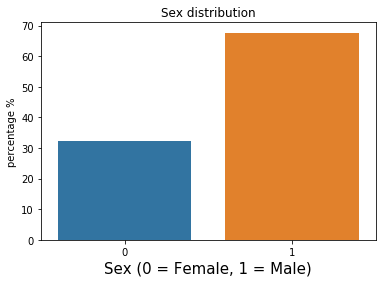

In [17]:
# finding the count of all the type of 'sex' 
sns.barplot(heart_disease.sex.value_counts().index,100*heart_disease.sex.value_counts(normalize = True))
plt.title('Sex distribution')
plt.xlabel('Sex (0 = Female, 1 = Male)',fontsize = 15)
plt.ylabel('percentage %')
plt.show()

In [21]:
heart_disease.restecg.unique()

array([2, 0, 1])

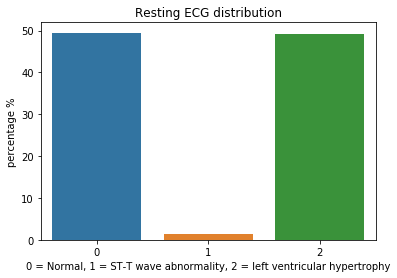

In [22]:
# finding the count of all the type of 'restecg' 
sns.barplot(heart_disease.restecg.value_counts().index,100*heart_disease.restecg.value_counts(normalize = True))
plt.title('Resting ECG distribution')
plt.xlabel('0 = Normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy')
plt.ylabel('percentage %')
plt.show()

In [23]:
heart_disease.cp.unique()

array([1, 4, 3, 2])

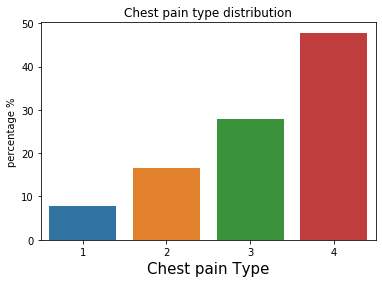

In [24]:
# finding the count of all the type of 'cp' 
sns.barplot(heart_disease.cp.value_counts().index,100*heart_disease.cp.value_counts(normalize = True))
plt.title('Chest pain type distribution')
plt.xlabel('Chest pain Type',fontsize = 15)
plt.ylabel('percentage %')
plt.show()

## Bivariate Analysis 

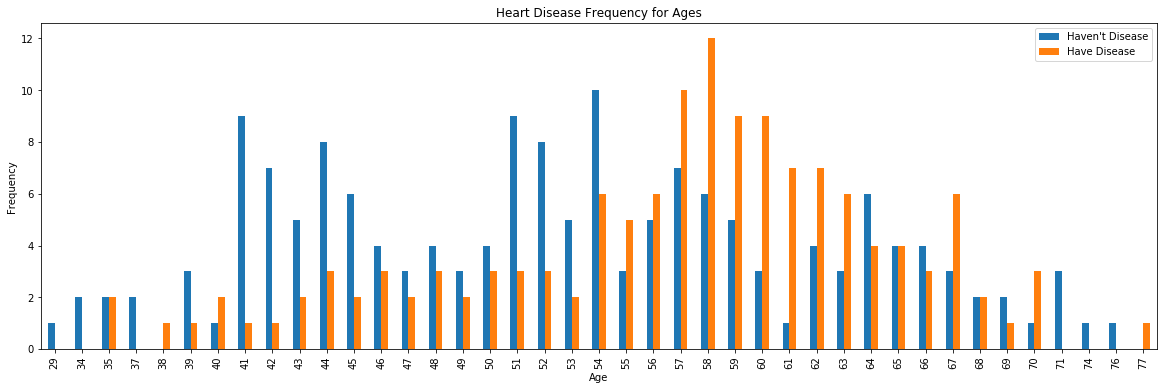

In [25]:
# finding heart disease frequency with the age parameter

pd.crosstab(heart_disease.age,heart_disease.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.savefig('heartDiseaseAndAges.png')
plt.show()

The trend above shows that the likelihood of heart diease increases along with age. 

In [26]:
heart_disease.fbs.unique()

array([1, 0])

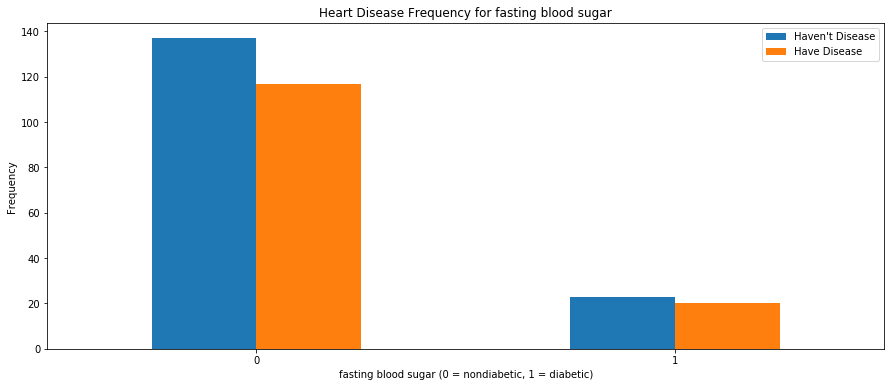

In [27]:
#Relation of heart disease with fbs
pd.crosstab(heart_disease.fbs,heart_disease.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for fasting blood sugar')
plt.xlabel('fasting blood sugar (0 = nondiabetic, 1 = diabetic)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

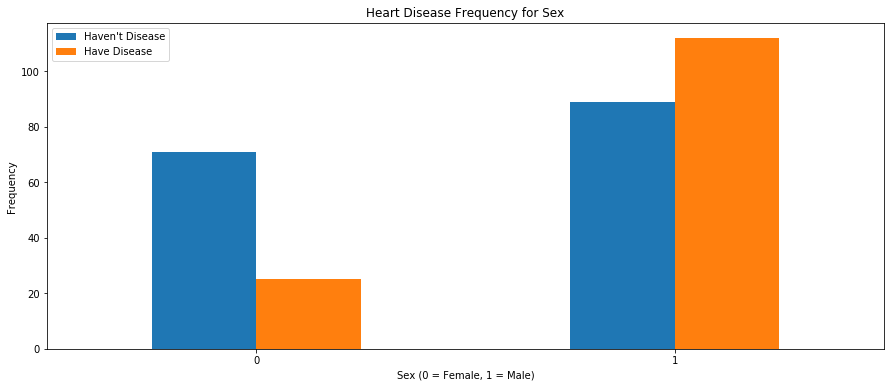

In [28]:
#Relation of heart disease with sex
pd.crosstab(heart_disease.sex,heart_disease.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

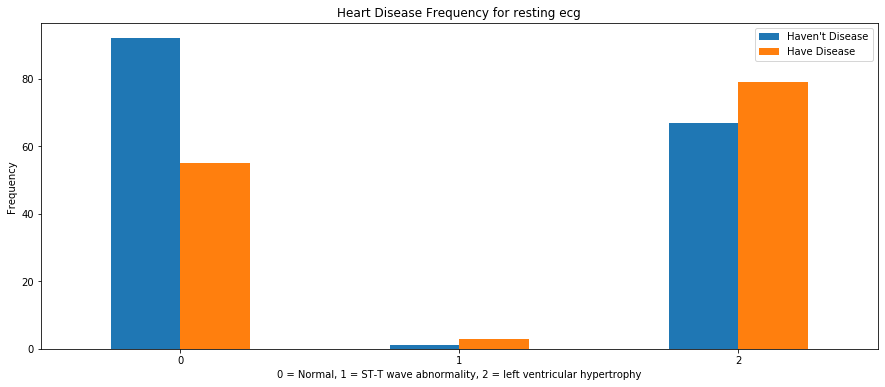

In [29]:
# relation of heart disease with resting ecg
pd.crosstab(heart_disease.restecg,heart_disease.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for resting ecg')
plt.xlabel('0 = Normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

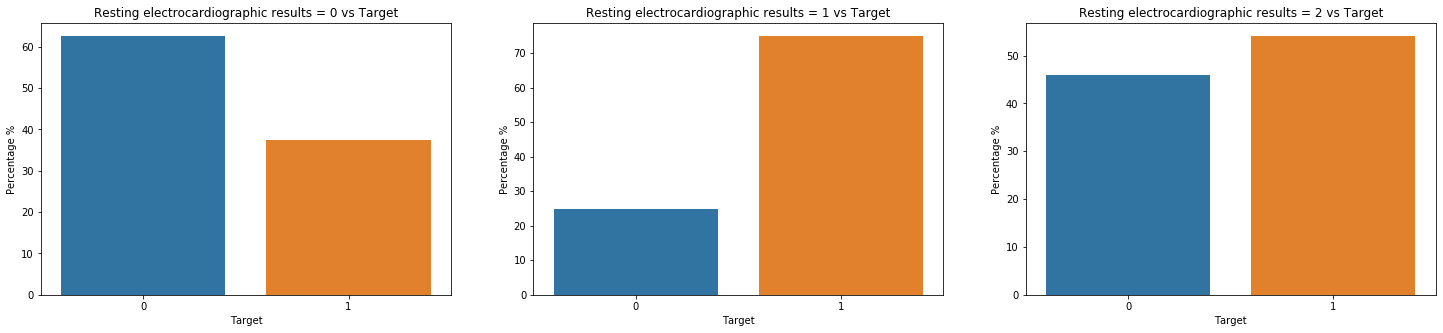

In [30]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.barplot(heart_disease[heart_disease.restecg == 0].target.value_counts().index,100*heart_disease[heart_disease.restecg == 0].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Resting electrocardiographic results = 0 vs Target')
plt.subplot(1,3,2)
sns.barplot(heart_disease[heart_disease.restecg == 1].target.value_counts().index,100*heart_disease[heart_disease.restecg == 1].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Resting electrocardiographic results = 1 vs Target')
plt.subplot(1,3,3)
sns.barplot(heart_disease[heart_disease.restecg == 2].target.value_counts().index,100*heart_disease[heart_disease.restecg == 2].target.value_counts(normalize = True))
plt.xlabel('Target')
plt.ylabel('Percentage %')
plt.title('Resting electrocardiographic results = 2 vs Target')
plt.show()

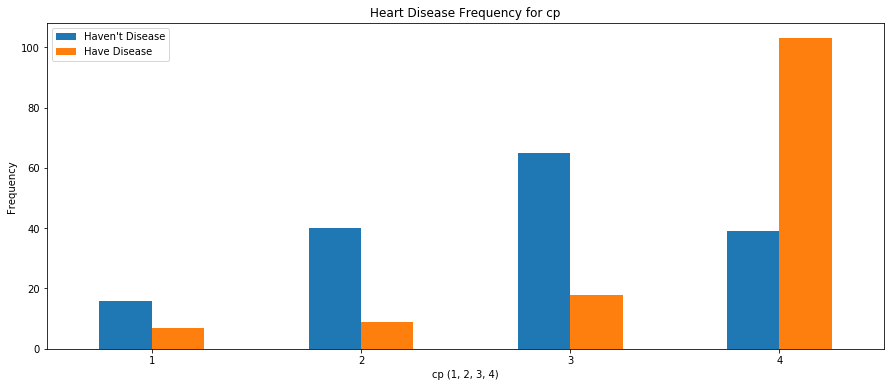

In [31]:
# finding heart disease frequency with the chest pain type parameter
pd.crosstab(heart_disease.cp,heart_disease.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for cp')
plt.xlabel('cp (1, 2, 3, 4)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


## Multivariate Analysis 

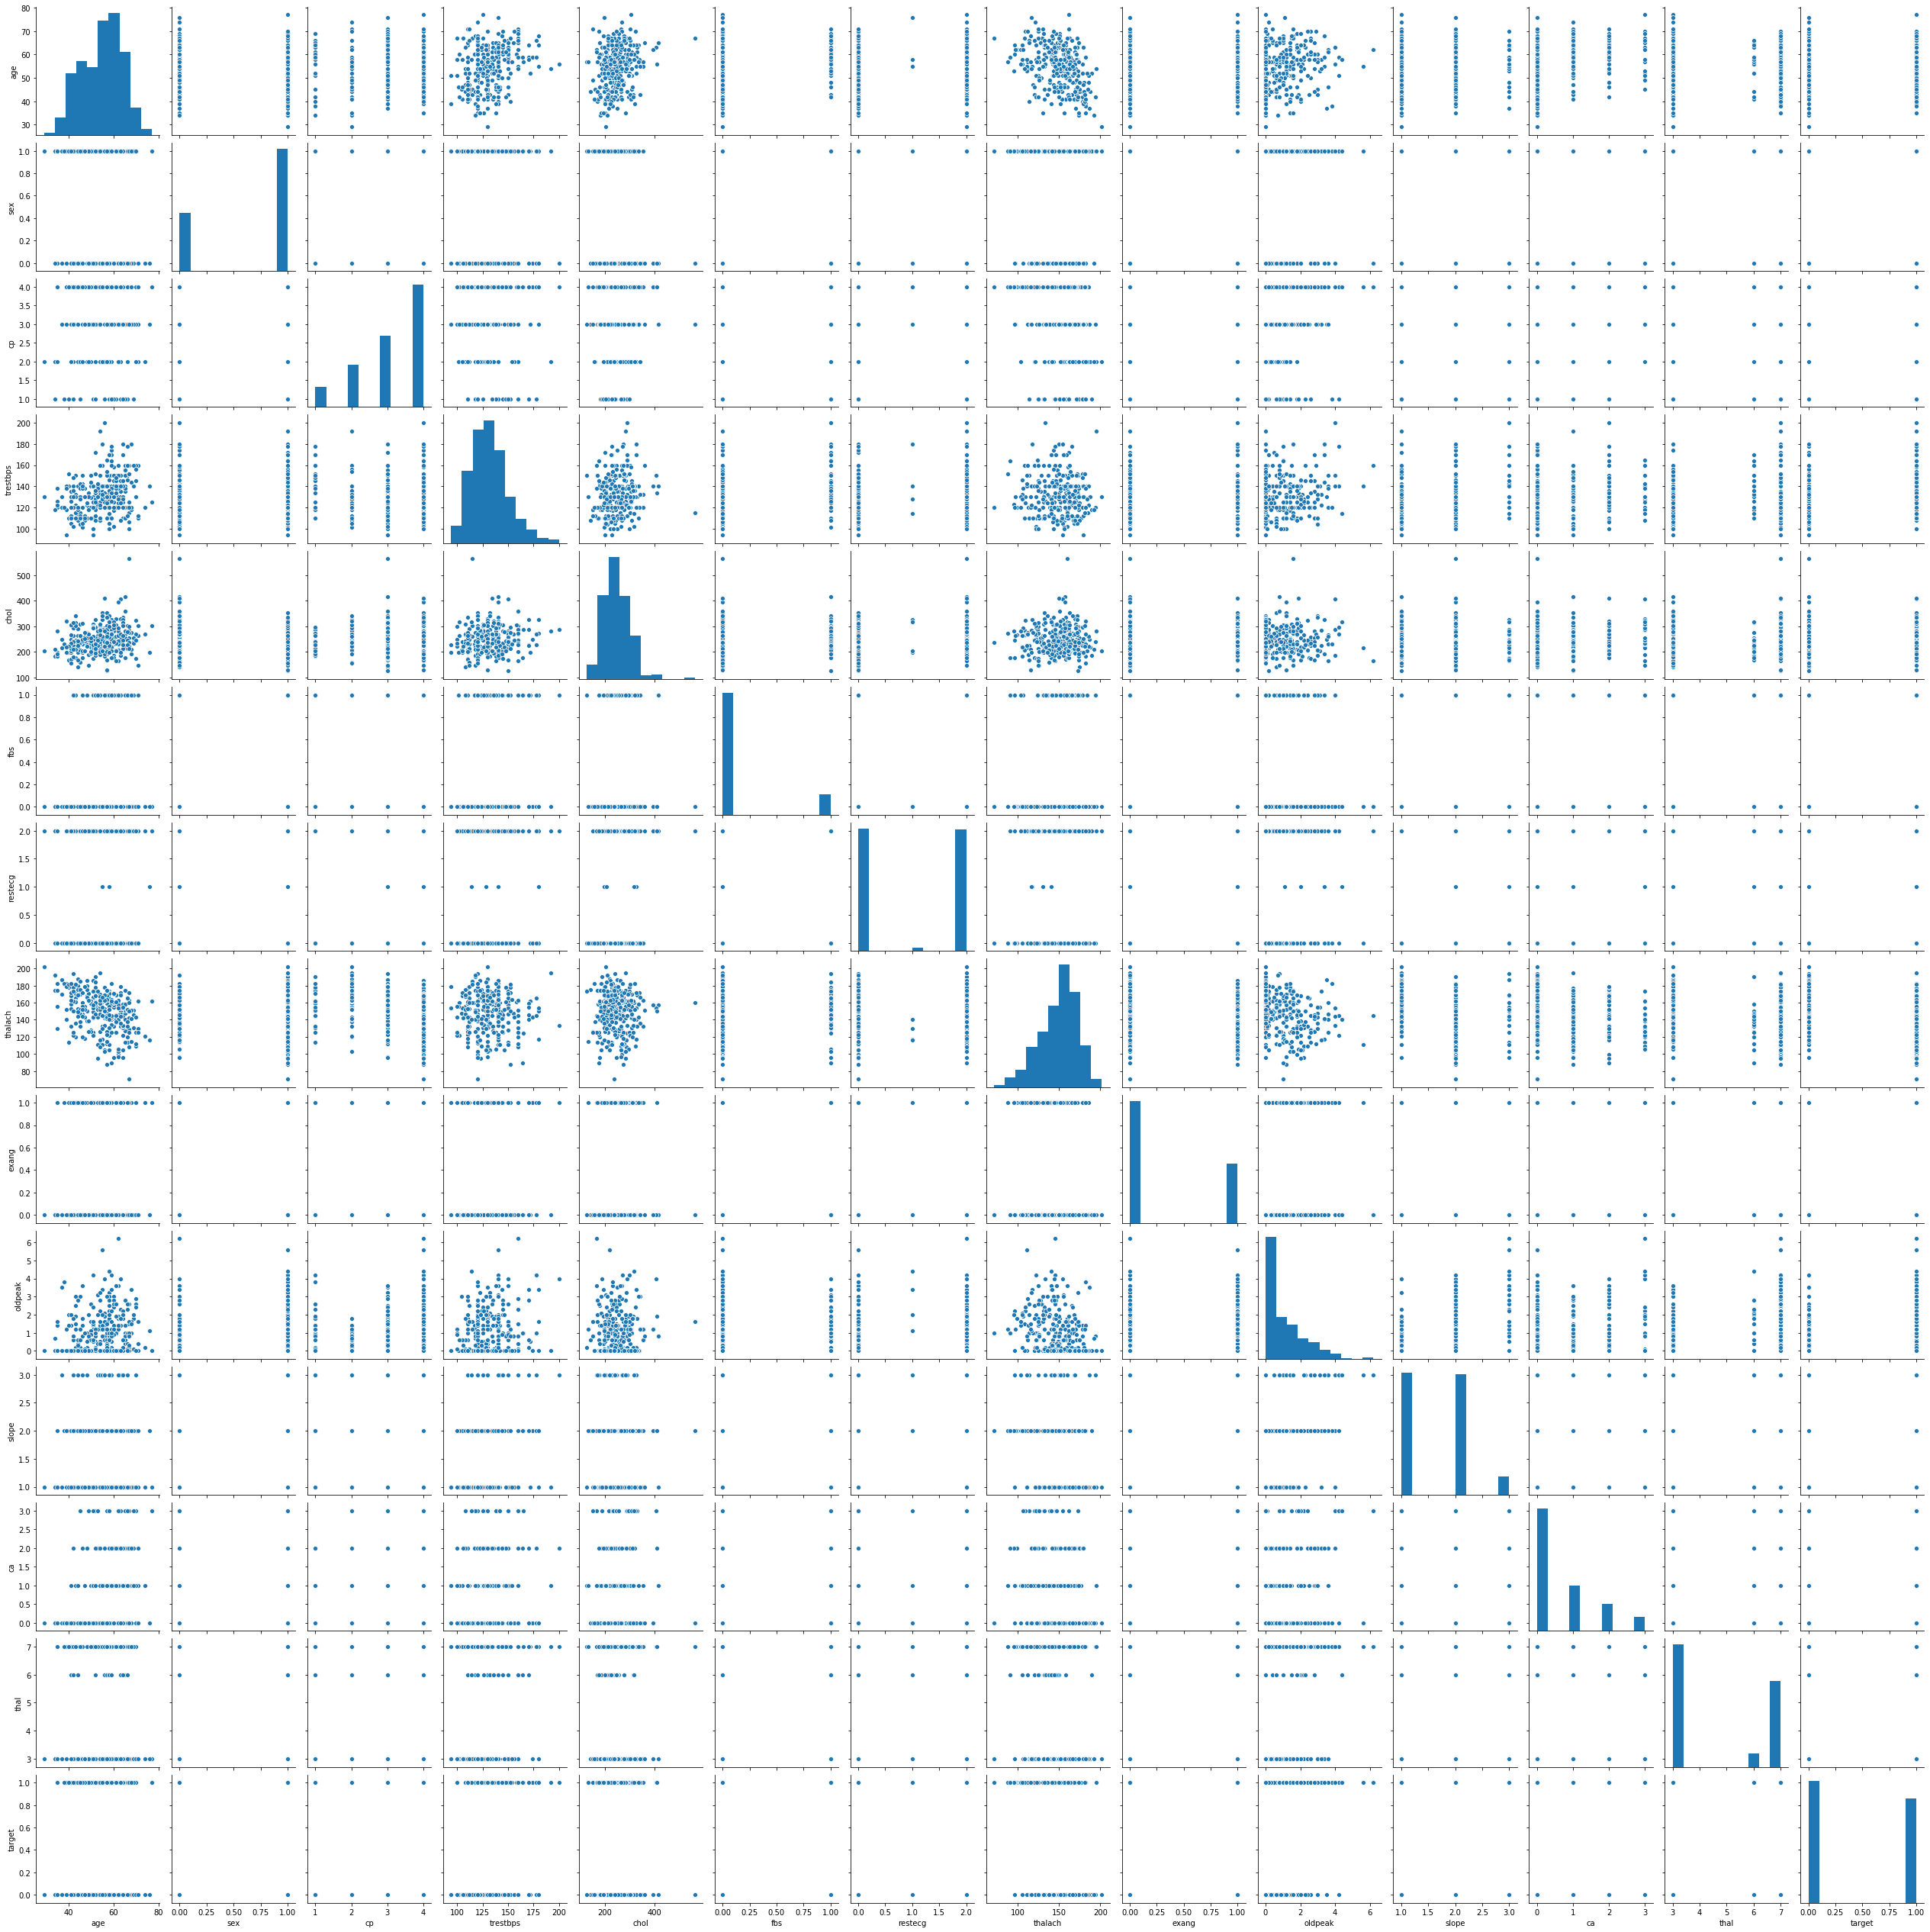

In [32]:
sns.pairplot(heart_disease)
plt.show()

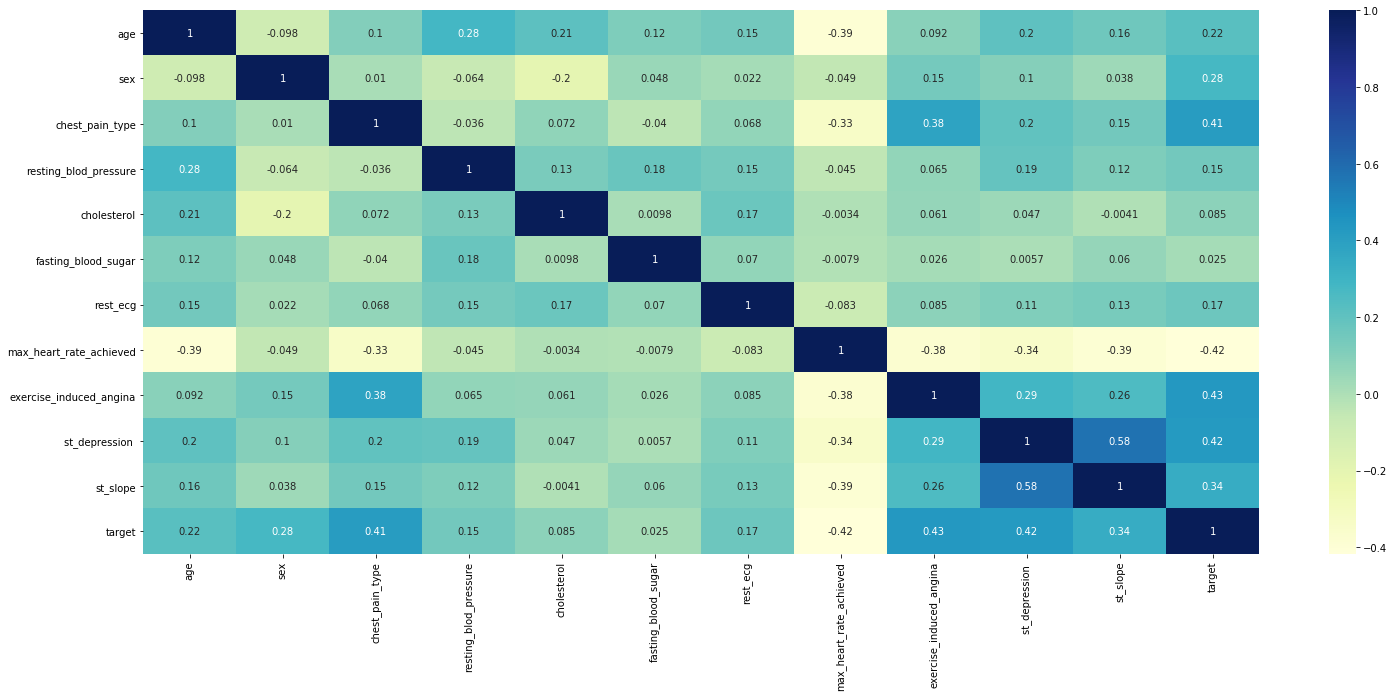

In [24]:
plt.figure(figsize = (25,10))
sns.heatmap(heart_disease.corr(),annot=True,cmap = 'YlGnBu')
plt.show()

## Hypothesis Testing

#### Hypothesis Test 1

• H0: $\rho$ = 0

• H1: $\rho$ $\neq$ 0

In words:

• The null hypothesis states that there is no significant relationship between age and heart disease.

• The alternative hypothesis states that there is a significant relationsip between age and heart disease. 

In [25]:
corr_coeff, p_val = spearmanr(heart_disease.age, heart_disease.target)
print('Spearman\'s Correlation Coefficient: ' + str(corr_coeff))
print('p-value: ' + str(p_val))

Spearman's Correlation Coefficient: 0.23667448283371217
p-value: 3.154422142381379e-05


p-value is greater than 0.05 so we accept null

In [35]:
logit_age = sm.Logit(heart_disease.target, heart_disease.age).fit()

Optimization terminated successfully.
         Current function value: 0.692133
         Iterations 3


In [36]:
print(logit_age.summary()) 

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      302
Method:                           MLE   Df Model:                            0
Date:                Wed, 20 Jan 2021   Pseudo R-squ.:               -0.003470
Time:                        19:33:45   Log-Likelihood:                -209.72
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0016      0.002     -0.784      0.433      -0.006       0.002


#### Hypothesis Test 2

• H0:  𝜌  = 0

• H1:  𝜌   ≠  0

In words:

• The null hypothesis states that there is no significant relationship between cholesterol and heart disease.

• The alternative hypothesis states that there is a significant relationsip between cholesterol and heart disease.

In [33]:
corr_coeff, p_val = spearmanr(heart_disease.chol, heart_disease.target)
print('Spearman\'s Correlation Coefficient: ' + str(corr_coeff))
print('p-value: ' + str(p_val))

Spearman's Correlation Coefficient: 0.11565400290797957
p-value: 0.046433924233820936


p-value is less than 0.05 so we reject the null hypothesis and accept the alternate

In [34]:
logit_chol = sm.Logit(heart_disease.target, heart_disease.chol).fit()

Optimization terminated successfully.
         Current function value: 0.691385
         Iterations 3


In [35]:
print(logit_chol.summary()) 

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  297
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            0
Date:                Sat, 23 Jan 2021   Pseudo R-squ.:               -0.001795
Time:                        15:20:44   Log-Likelihood:                -205.34
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
chol          -0.0005      0.000     -1.022      0.307      -0.001       0.000


#### Hypothesis Test 3

• H0:  𝜌  = 0

• H1:  𝜌   ≠  0

In words:

• The null hypothesis states that there is no significant relationship between resting blood pressure and heart disease.

• The alternative hypothesis states that there is a significant relationsip between resting blood pressure and heart disease.

In [36]:
corr_coeff, p_val = spearmanr(heart_disease.trestbps, heart_disease.target)
print('Spearman\'s Correlation Coefficient: ' + str(corr_coeff))
print('p-value: ' + str(p_val))

Spearman's Correlation Coefficient: 0.13174028158972423
p-value: 0.023165003218545328


p-value is less than 0.05 so we reject null and accept alternate hypothesis. 

In [37]:
logit_resting_blood_pressure = sm.Logit(heart_disease.target, heart_disease.trestbps).fit()

Optimization terminated successfully.
         Current function value: 0.691560
         Iterations 3


In [39]:
print(logit_resting_blood_pressure.summary()) 

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  297
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            0
Date:                Sat, 23 Jan 2021   Pseudo R-squ.:               -0.002049
Time:                        15:23:05   Log-Likelihood:                -205.39
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trestbps      -0.0008      0.001     -0.970      0.332      -0.003       0.001
